# Fuel Econemy Analyse

In [178]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
cwd = os.getcwd()
os.listdir(cwd)

['data_18.csv',
 'data_08.csv',
 '.DS_Store',
 'fuel_econemy.ipynb',
 '.ipynb_checkpoints',
 'all_alpha_08.csv',
 'all_alpha_18.csv']

In [3]:
df_18 = pd.read_csv('all_alpha_18.csv')
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404
3,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,20,27,23,5,No,390
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404


In [4]:
df_08 = pd.read_csv('all_alpha_08.csv')
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [5]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 18 columns):
Model                   2435 non-null object
Displ                   2423 non-null float64
Cyl                     2423 non-null float64
Trans                   2435 non-null object
Drive                   2435 non-null object
Fuel                    2435 non-null object
Cert Region             2435 non-null object
Stnd                    2435 non-null object
Stnd Description        2435 non-null object
Underhood ID            2435 non-null object
Veh Class               2435 non-null object
Air Pollution Score     2435 non-null int64
City MPG                2435 non-null object
Hwy MPG                 2435 non-null object
Cmb MPG                 2435 non-null object
Greenhouse Gas Score    2435 non-null int64
SmartWay                2435 non-null object
Comb CO2                2435 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 342.5+ KB


In [6]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


### find duplicated

In [7]:
sum(df_08.duplicated())

25

In [8]:
df_08.describe()

,Displ,Unadj Cmb MPG
count,2404.000000,2205.000000
mean,3.748918,23.916104
std,1.335785,6.366170
min,1.300000,10.018400
25%,2.500000,19.113900
50%,3.500000,23.921300
75%,4.800000,27.869300
max,8.400000,65.777800


In [9]:
df_18.shape

(2435, 18)

## Find the uniques

In [10]:
df_18.SmartWay.unique()

array(['No', 'Elite', 'Yes'], dtype=object)

In [11]:
df_08.SmartWay.unique()

array(['no', 'yes'], dtype=object)

In [12]:
df_08['Sales Area'].unique()

array(['CA', 'FA', 'FC'], dtype=object)

In [13]:
df_18['Cert Region'].unique()

array(['CA', 'FA'], dtype=object)

In [16]:
df_08['Trans'].unique()

array(['Auto-S5', 'Man-6', 'Auto-S6', 'Auto-AV', 'Auto-S7', 'Auto-L4',
       'Auto-L6', 'Auto-4', 'Man-5', 'Auto-L5', nan, 'Auto-6', 'S8',
       'Auto-S4', 'Auto-L7'], dtype=object)

In [17]:
len(df_08['Trans'].unique())

15

In [18]:
df_08.Fuel.unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'], dtype=object)

In [19]:
df_18.Fuel.unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Electricity',
       'Ethanol/Gas'], dtype=object)

# Cleaning Column Labels
Use `all_alpha_08.csv` and `all_alpha_18.csv`

### Drop Extraneous Columns

In [20]:
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


### 删除多余的行列

In [21]:
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

In [22]:
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [23]:
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1,inplace=True)

In [24]:
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No


### Rename Columns

In [25]:
df_08.rename(index=str, columns={'Sales Area': 'Cert Region'}, inplace=True)
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [26]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [30]:
df_18.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

In [31]:
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [32]:
# make sure they're all identical like this
# 数组中所有都是True 才是True
(df_08.columns == df_18.columns).all()

True

In [41]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

# Filter, Drop Nulls, Dedupe
Use `data_08.csv` and `data_18.csv`

In [50]:
df_08 = pd.read_csv('data_08.csv')
df_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
2,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no
3,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,18,26,21,6,yes
4,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7,17,26,20,6,yes


In [51]:
df_18 = pd.read_csv('data_18.csv')
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,25,35,29,6,No
1,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,3,19,27,22,4,No
2,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,3,20,27,23,5,No
3,ACURA MDX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small SUV,3,18,26,21,4,No
4,ACURA MDX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small SUV,3,19,26,22,4,No


In [42]:
df_08.shape

(1084, 14)

In [43]:
df_18.shape

(1204, 13)

## Filter by Certification Region

In [44]:
# filter datasets for rows following California standards
df_08.cert_region.unique()

array(['CA'], dtype=object)

In [45]:
df_08 = df_08.query('cert_region == "CA"')
df_08.cert_region.unique()

array(['CA'], dtype=object)

In [48]:
df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

### 删除列

In [46]:
df_08.drop('cert_region', axis=1, inplace=True)
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


In [50]:
df_18.shape

(1204, 13)

In [51]:
df_08.shape

(1084, 13)

## Drop Rows with Missing Values

In [52]:
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
cert_region              0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [53]:
df_18.isnull().sum()

model                   0
displ                   6
cyl                     6
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

## 删除缺数据的行

In [54]:
df_18.dropna(inplace=True)
df_08.dropna(inplace=True)

In [55]:
df_08.isnull().sum().any()

False

In [56]:
df_18.isnull().sum().any()

False

## Dedupe Data 删除重复数据

In [57]:
sum(df_08.duplicated())

23

In [58]:
sum(df_18.duplicated())

8

In [59]:
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [60]:
sum(df_08.duplicated())

0

In [61]:
sum(df_18.duplicated())

0

In [62]:
# save progress for the next section
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

# Inspecting Data Types
Use the space below to explore `data_08.csv` and `data_18.csv` to answer the quiz questions below regarding datatypes.

In [63]:
df_08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [64]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

# Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [65]:
df_08.cyl.dtypes

dtype('O')

In [66]:
df_08.cyl.value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [67]:
# 提取字符串中的数字
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)', expand=True).astype(int)

In [68]:
df_18.cyl.dtypes

dtype('float64')

In [69]:
# 转换数据dataframe的数据类型
df_18['cyl'] = df_18.cyl.astype(int)
df_18.cyl.dtypes

dtype('int64')

In [70]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

# Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [15]:
df_08 = pd.read_csv('data_08.csv')
df_18 = pd.read_csv('data_18.csv')

In [3]:
# try using Pandas to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
df_08.air_pollution_score.head(3)

0    7
1    7
2    7
Name: air_pollution_score, dtype: object

In [11]:
df_08.air_pollution_score.astype(float)

ValueError: could not convert string to float: '6/4'

# Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the value at row 582 is "6/4" - let's check it out.

In [13]:
df_08.query("air_pollution_score == '6/4'")

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


# It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [16]:
hb_08 = df_08[df_08.fuel.str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


Looks like this dataset only has one! The 2018 has MANY more - but don't worry - the steps I'm taking here will work for that as well!

In [18]:
hb_18 = df_18[df_18.fuel.str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
23,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite
81,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
107,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
108,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
122,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
160,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,3,23/55,25/57,24/56,8,Yes
193,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline/Electricity,midsize car,3,23/56,29/71,25/62,10,Yes
249,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
255,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
256,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [19]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


For this next part, we're going use Pandas' apply function. See the docs [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html).

In [21]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# 对用函数对每一项进行处理
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.split('/')[1])
df1

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,CA,small car,6,13,19,15,7,no


In [22]:
df2

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,CA,small car,4,18,25,21,6,no


In [33]:
newrow = df1.append(df2)
newrow

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,CA,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,CA,small car,4,18,25,21,6,no


In [24]:
hb_08.index

Int64Index([582], dtype='int64')

In [25]:
df_08.drop(hb_08.index, inplace=True)

In [27]:
df_08.shape

(985, 14)

In [34]:
df_08 = df_08.append(newrow)
df_08.shape

(987, 14)

In [30]:
df_08[df_08.fuel.str.contains('/')]

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


# Repeat this process for the 2018 dataset

In [42]:
df1 = hb_18.copy()
df2 = hb_18.copy()

['Gasoline/Electricity', '28/66', '34/78', '30/71']

In [43]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.split('/')[1])
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
23,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline,small car,7,34,39,36,10,Elite
81,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
107,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
108,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
122,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
160,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,3,23,25,24,8,Yes
193,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline,midsize car,3,23,29,25,10,Yes
249,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
255,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,pickup,5,12,16,14,4,No
256,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol,pickup,5,12,15,13,3,No


In [46]:
df2.shape

(63, 13)

In [45]:
newrow = df1.append(df2)
newrow.shape

(126, 13)

In [47]:
print('shape before %d',df_18.shape[0])
df_18.drop(hb_18.index, inplace=True)
print('shape after %d',df_18.shape[0])

shape before %d 1190
shape after %d 1127


In [49]:
df_18 = df_18.append(newrow)
df_18.shape[0]

1253

### Now we can comfortably continue the changes needed for `air_pollution_score`! Here they are again:
- 2008: convert string to float
- 2018: convert int to float

In [50]:
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

In [52]:
df_08.shape

(987, 14)

In [53]:
df_18.shape

(1253, 13)

In [55]:
df_08.drop('cert_region', axis=1 ,inplace=True)

In [56]:
df_08.shape

(987, 13)

In [58]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [59]:
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [60]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08.greenhouse_gas_score.astype(int)

In [61]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [62]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [63]:
(df_08.dtypes == df_18.dtypes).any()

True

In [64]:
# Save your new CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

# Exploring with Visuals
Use `clean_08.csv` and `clean_18.csv`

In [65]:
# load datasets

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Compare the distributions of greenhouse gas score in 2008 and 2018.

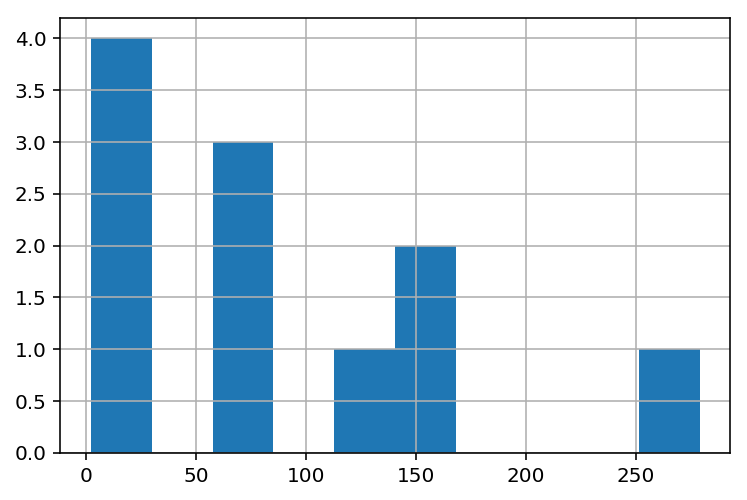

In [69]:
df_08.greenhouse_gas_score.value_counts().hist();

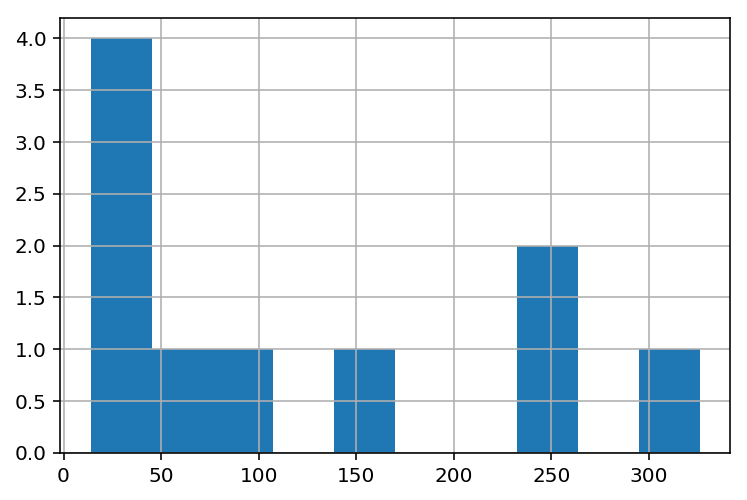

In [70]:
df_18.greenhouse_gas_score.value_counts().hist();

### How has the distribution of combined mpg changed from 2008 to 2018?

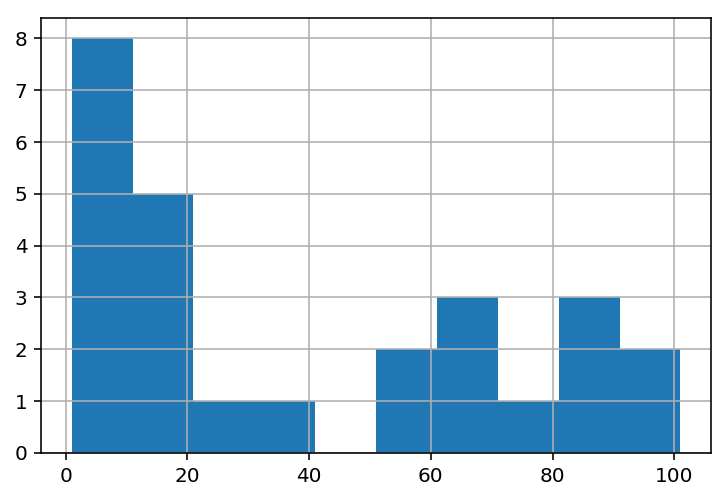

In [71]:
df_08.cmb_mpg.value_counts().hist()

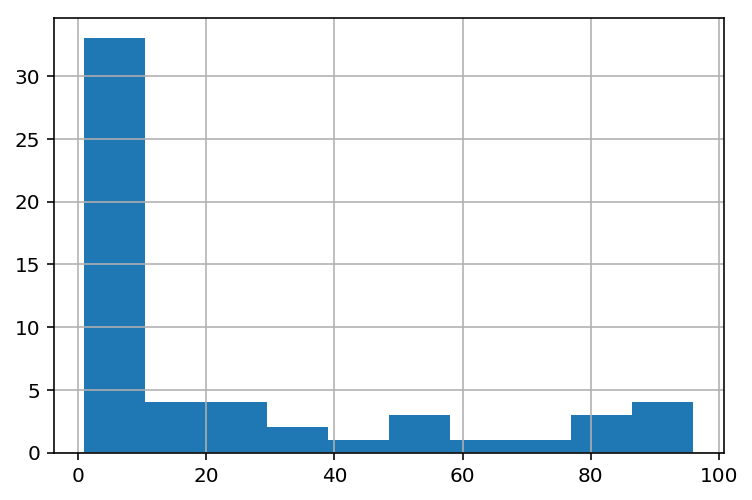

In [73]:
df_18.cmb_mpg.value_counts().hist();

### Describe the correlation between displacement and combined mpg.

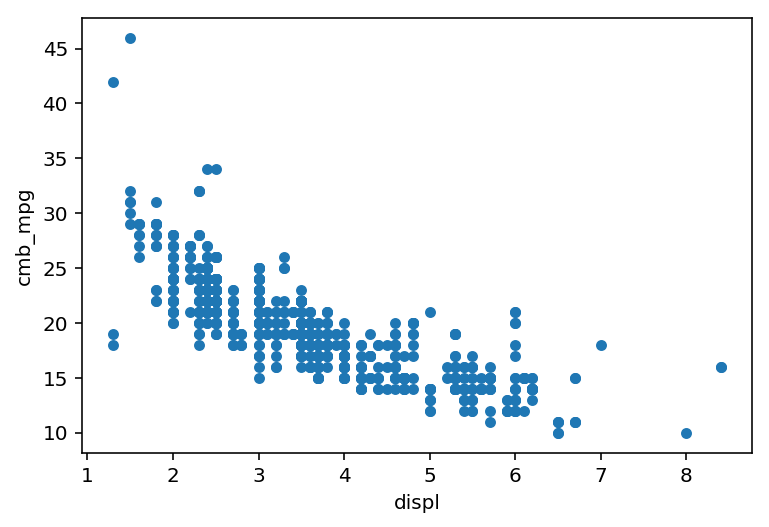

In [76]:
df_08.plot.scatter('displ','cmb_mpg');

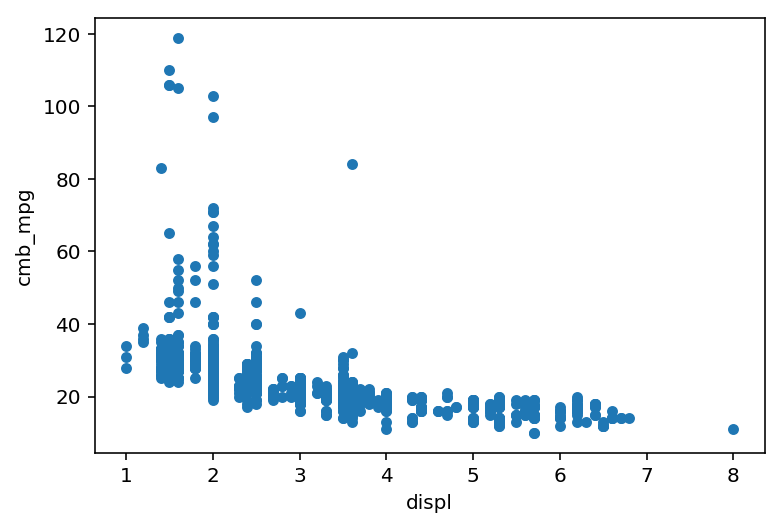

In [77]:
df_18.plot.scatter('displ','cmb_mpg');

### Describe the correlation between greenhouse gas score and combined mpg.

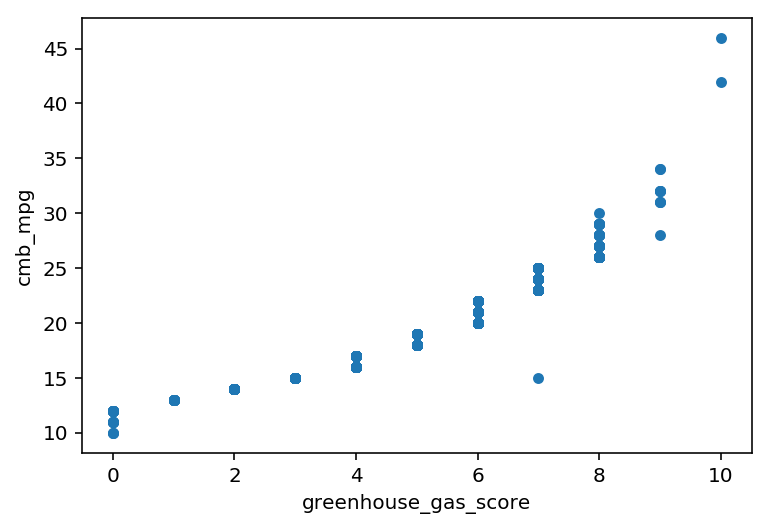

In [78]:
df_08.plot.scatter('greenhouse_gas_score','cmb_mpg');

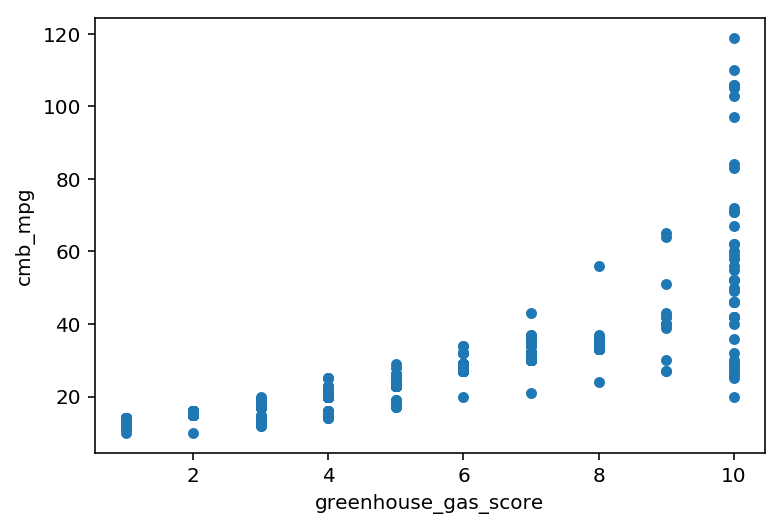

In [79]:
df_18.plot.scatter('greenhouse_gas_score','cmb_mpg');

# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [91]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [92]:
df_08.fuel.unique()

array(['Gasoline', 'CNG', 'ethanol', 'gas'], dtype=object)

In [112]:
df_18.fuel.unique()

array(['Gasoline', 'Diesel', 'Ethanol', 'Electricity', 'Gas'], dtype=object)

In [118]:
# nunique numer of unique
alt_08 = df_08.query("fuel in ['CNG', 'ethanol']").model.nunique()
alt_08

2

In [119]:
alt_18 = df_18.query("fuel in ['Ethanol', 'Electricity']").model.nunique()
alt_18

40

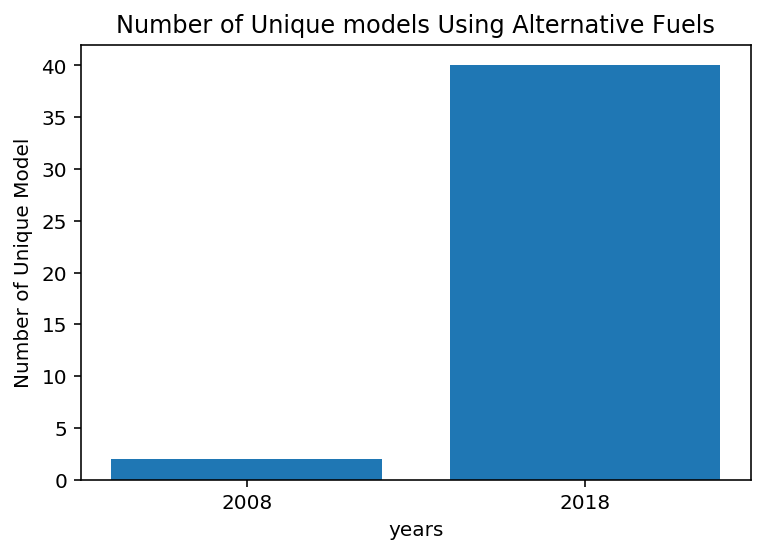

In [126]:
plt.bar(['2008', '2018'],[alt_08, alt_18])
plt.title('Number of Unique models Using Alternative Fuels')
plt.xlabel('years')
plt.ylabel('Number of Unique Model')

plt.legend()

In [127]:
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 553)

In [128]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07233273056057866)

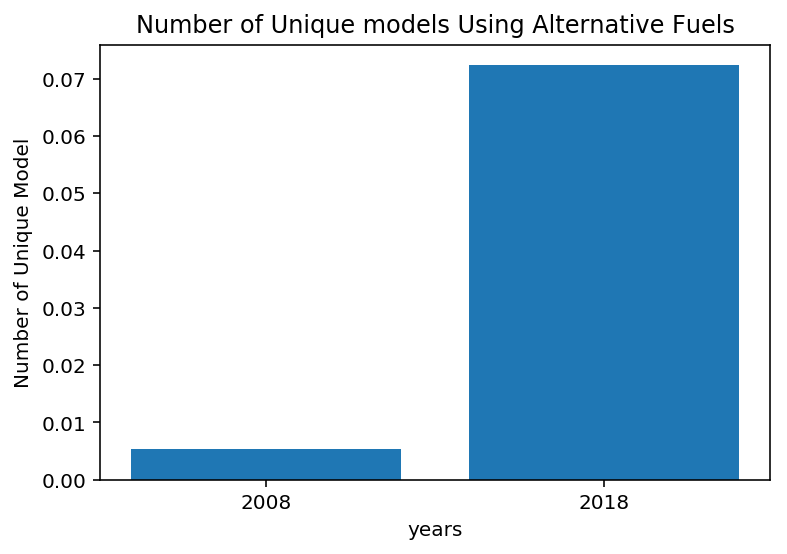

In [129]:
plt.bar(['2008', '2018'],[prop_08, prop_18])
plt.title('Number of Unique models Using Alternative Fuels')
plt.xlabel('years')
plt.ylabel('Number of Unique Model');

### Q2: How much have vehicle classes improved in fuel economy?  

In [135]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [136]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.420635
midsize car        29.306533
minivan            28.200000
pickup             18.100000
small SUV          23.933649
small car          25.500000
special purpose    19.937500
standard SUV       18.816794
station wagon      30.460000
van                16.000000
Name: cmb_mpg, dtype: float64

In [137]:
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.911544
midsize car        7.705083
minivan            9.082353
pickup             1.822892
small SUV               NaN
small car          4.394895
special purpose         NaN
standard SUV            NaN
station wagon      8.093333
van                1.047619
Name: cmb_mpg, dtype: float64

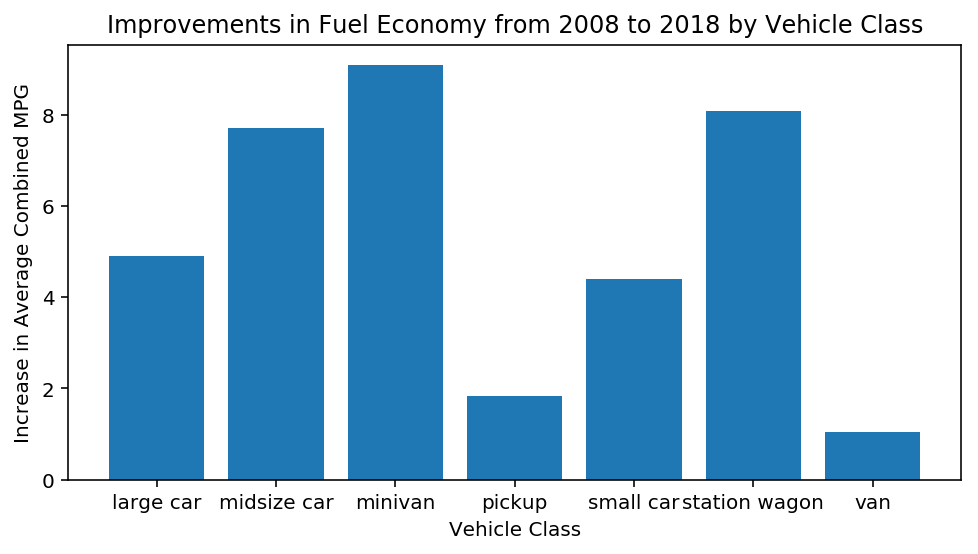

In [145]:
inc.dropna(inplace=True)
# 创建一个图标框
plt.subplots(figsize=(8,4))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [147]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [148]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [150]:
smart_08 = df_08.query('smartway == "yes"')
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [153]:
smart_18 = df_18.query("smartway in ['Yes', 'Elite']")
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,1.805525,4.005525,5.232044,37.011050,42.933702,39.232044,8.088398
std,0.455915,0.477229,1.847302,18.865603,15.206213,17.143553,1.207812
min,1.000000,3.000000,3.000000,20.000000,23.000000,21.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,6.000000,29.000000,38.000000,33.000000,8.000000
75%,2.000000,4.000000,7.000000,37.000000,42.000000,39.000000,9.000000
max,3.600000,6.000000,8.000000,123.000000,114.000000,119.000000,10.000000


In [188]:
width = 0.35
length = smart_08.mean().count()
location = np.arange(1,length+1)*2

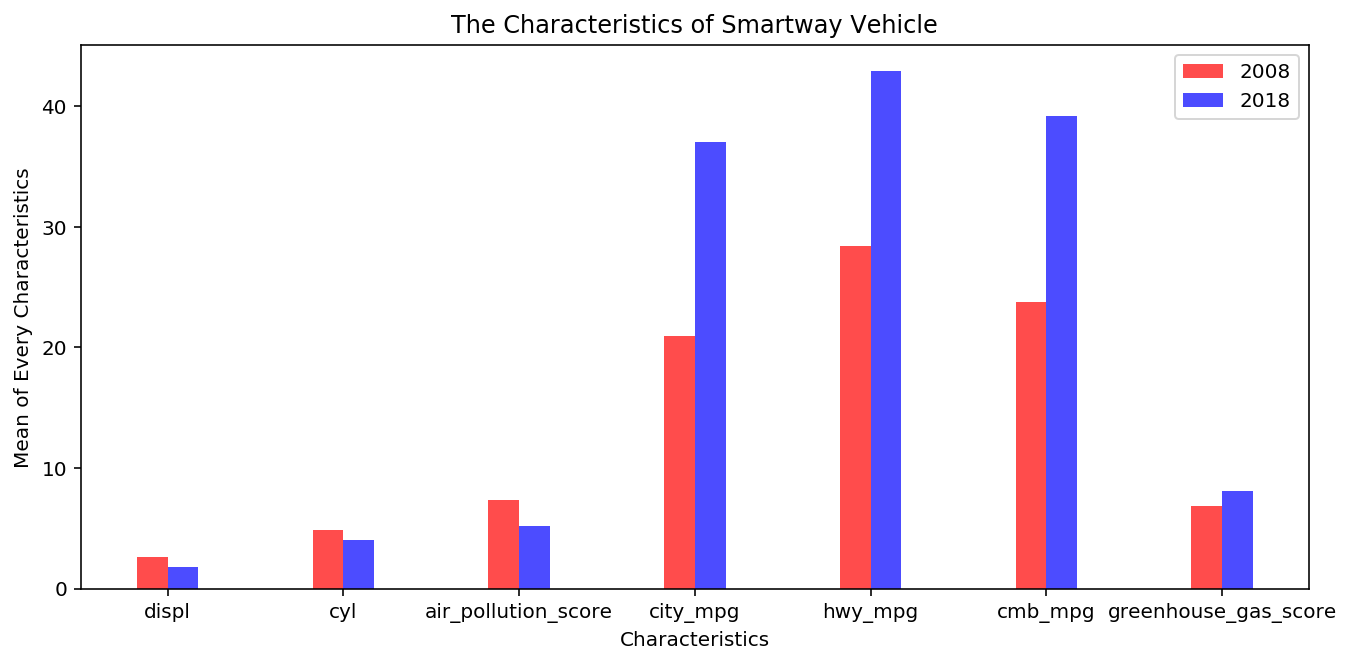

In [199]:
plt.subplots(figsize=(11,5))
bar_08 = plt.bar(location-width/2, smart_08.mean(),width, color='r', alpha=.7);
bar_18 = plt.bar(location+width/2, smart_18.mean(),width, color='b', alpha=.7);
plt.xticks(location, smart_08.mean().index);
plt.xlabel('Characteristics')
plt.ylabel('Mean of Every Characteristics')
plt.title('The Characteristics of Smartway Vehicle')

plt.legend([bar_08, bar_18], ['2008', '2018']);

### Q4: What features are associated with better fuel economy?

# Merging Datasets
Use Pandas Merges to create a combined dataset from `clean_08.csv` and `clean_18.csv`.

In [200]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Create combined dataset

In [209]:
df_08.rename(index=str, columns=lambda x:x[:10]+'_2008' ,inplace=True)
df_08.head()

,model_2008,displ_2008_2008,cyl_2008_2008,trans_2008_2008,drive_2008_2008,fuel_2008_2008,veh_class__2008,air_pollut_2008,city_mpg_2_2008,hwy_mpg_20_2008,cmb_mpg_20_2008,greenhouse_2008,smartway_2_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [210]:
df_combined = pd.merge(df_08,df_18, left_on='model_2008', right_on='model',how='inner')
df_combined.head()

,model_2008,displ_2008_2008,cyl_2008_2008,trans_2008_2008,drive_2008_2008,fuel_2008_2008,veh_class__2008,air_pollut_2008,city_mpg_2_2008,hwy_mpg_20_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No
3,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,19.0,26.0,22.0,4,No
4,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No


In [211]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 1372
Data columns (total 26 columns):
model_2008              1373 non-null object
displ_2008_2008         1373 non-null float64
cyl_2008_2008           1373 non-null int64
trans_2008_2008         1373 non-null object
drive_2008_2008         1373 non-null object
fuel_2008_2008          1373 non-null object
veh_class__2008         1373 non-null object
air_pollut_2008         1373 non-null float64
city_mpg_2_2008         1373 non-null float64
hwy_mpg_20_2008         1373 non-null float64
cmb_mpg_20_2008         1373 non-null float64
greenhouse_2008         1373 non-null int64
smartway_2_2008         1373 non-null object
model                   1373 non-null object
displ                   1373 non-null float64
cyl                     1373 non-null int64
trans                   1373 non-null object
drive                   1373 non-null object
fuel                    1373 non-null object
veh_class               1373 non-nu

In [213]:
(df_combined.model == df_combined.model_2008).any()

True

In [214]:
df_combined.to_csv('combined_dataset.csv', index=False)

# Results with Merged Dataset
Remember to use your new dataset, `combined_dataset.csv`

### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

In [215]:
# load data 

df = pd.read_csv('combined_dataset.csv')
df.head()

,model_2008,displ_2008_2008,cyl_2008_2008,trans_2008_2008,drive_2008_2008,fuel_2008_2008,veh_class__2008,air_pollut_2008,city_mpg_2_2008,hwy_mpg_20_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No
3,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,19.0,26.0,22.0,4,No
4,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No


- Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

In [234]:
model_mpg = pd.DataFrame({'cmb_mpg':df.groupby('model').mean()['cmb_mpg'],
                          'cmb_mpg_2008':df.groupby('model').mean()['cmb_mpg_20_2008']})

model_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, ACURA MDX to VOLVO XC 90
Data columns (total 2 columns):
cmb_mpg         118 non-null float64
cmb_mpg_2008    118 non-null float64
dtypes: float64(2)
memory usage: 2.8+ KB


 - Create a new column, ` mpg_change `, with the change in mpg

In [235]:
model_mpg['mpg_change'] = model_mpg.cmb_mpg - model_mpg.cmb_mpg_2008
model_mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, ACURA MDX to VOLVO XC 90
Data columns (total 3 columns):
cmb_mpg         118 non-null float64
cmb_mpg_2008    118 non-null float64
mpg_change      118 non-null float64
dtypes: float64(3)
memory usage: 8.7+ KB


In [236]:
model_mpg.describe()

,cmb_mpg,cmb_mpg_2008,mpg_change
count,118.000000,118.000000,118.000000
mean,23.115947,19.626265,3.489682
std,5.515493,4.784778,2.527031
min,14.000000,14.000000,-1.500000
25%,19.482143,16.000000,2.000000
50%,22.000000,18.757143,3.000000
75%,26.000000,21.937500,4.645833
max,52.000000,46.000000,16.533333


- Find the vehicle that improved the most

In [238]:
max_change = model_mpg.mpg_change.max()

In [239]:
model_mpg.query('mpg_change == {}'.format(max_change))

,cmb_mpg,cmb_mpg_2008,mpg_change
model,,,
VOLVO XC 90,32.2,15.666667,16.533333


## The VOLVO XC 90 improve the most in mpg